## Introduction:
In this kernel, I'll discus the various aspects and trends of the dataset on ***Netflix Shows and Movies***. I'll try to cover a detailed exploratory analysis of the dataset.

## Importing the required libraries:

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/netflix-shows/netflix_titles_nov_2019.csv


### Read the dataset:

In [3]:
df=pd.read_csv('/kaggle/input/netflix-shows/netflix_titles_nov_2019.csv')

## Let's have Overview of the Data:

In [4]:
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


### Brief Description:

In [5]:
df.describe(include='all')

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
count,5.837000e+03,5837,3936,5281,5410,5195,5837.000000,5827,5837,5837,5837,5837
unique,NaN,5780,3108,5087,527,1092,NaN,14,194,449,5829,2
top,NaN,Limitless,"Raúl Campos, Jan Suter",David Attenborough,United States,"November 1, 2019",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...,Movie
freq,NaN,3,18,18,1907,94,NaN,1937,1259,297,3,3939
mean,7.730079e+07,NaN,NaN,NaN,NaN,NaN,2013.688539,NaN,NaN,NaN,NaN,NaN
std,9.479777e+06,NaN,NaN,NaN,NaN,NaN,8.419088,NaN,NaN,NaN,NaN,NaN
min,2.698800e+05,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN,NaN
25%,8.004520e+07,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN
50%,8.016353e+07,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN
75%,8.024188e+07,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN,NaN


### Brief Information of various variables:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
show_id         5837 non-null int64
title           5837 non-null object
director        3936 non-null object
cast            5281 non-null object
country         5410 non-null object
date_added      5195 non-null object
release_year    5837 non-null int64
rating          5827 non-null object
duration        5837 non-null object
listed_in       5837 non-null object
description     5837 non-null object
type            5837 non-null object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


## Country-wise content creation:

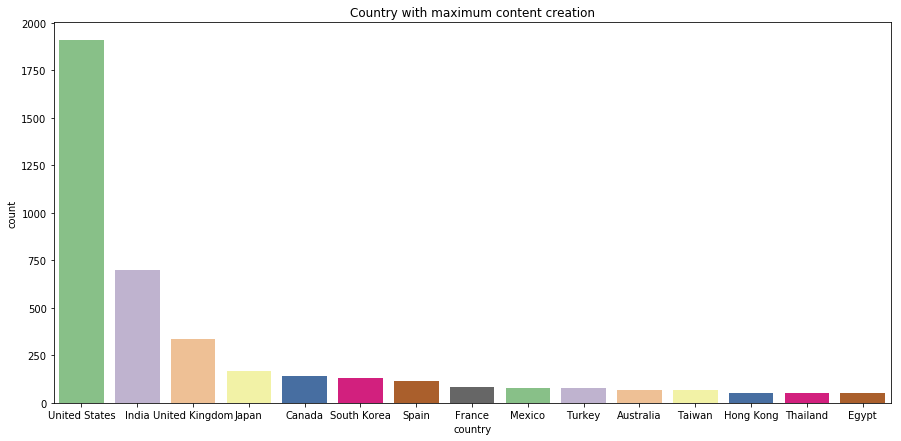

In [7]:
plt.figure(1, figsize=(15, 7))
plt.title("Country with maximum content creation")
sns.countplot(x = "country", order=df['country'].value_counts().index[0:15] ,data=df,palette='Accent')

As we can see that **U.S. and India** have maximum content creation. Rapid Development in India since *Netflix* is the new to India.

## Types of Rating and their Frequency:

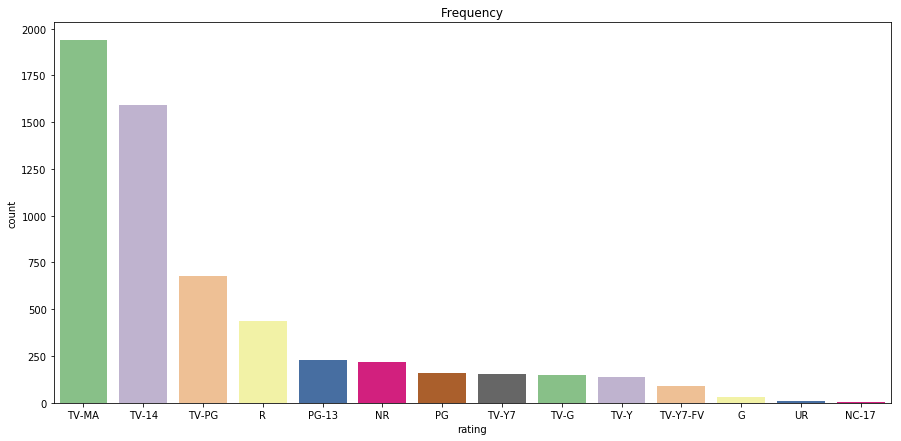

In [8]:
plt.figure(1, figsize=(15, 7))
plt.title("Frequency")
sns.countplot(x = "rating", order=df['rating'].value_counts().index[0:15] ,data=df,palette='Accent')

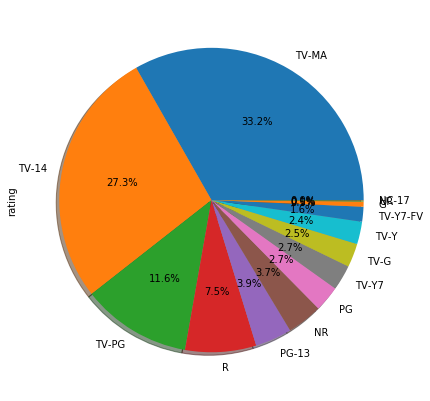

In [9]:
df['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(17,7))

33% Fall in catogery TV-MA ("TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.)

23% fall in catigery TV-14 (Programs rated TV-14 contains material that parents or adult guardians may find unsuitable for children under the age of 14.

12.5 % fall in category TV-PG (TV-PG: Parental guidance suggested. This program contains material that parents may find unsuitable for younger children)

## Year-wise growth

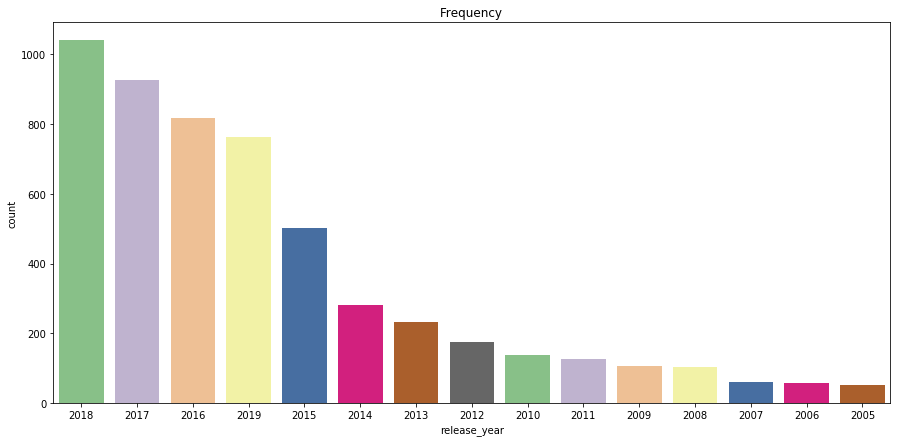

In [10]:
plt.figure(1, figsize=(15, 7))
plt.title("Frequency")
sns.countplot(x = "release_year", order=df['release_year'].value_counts().index[0:15] ,data=df,palette='Accent')

In [11]:
import plotly.graph_objects as go
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

col = "release_year"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(
                    x=vc1[col], 
                    y=vc1["count"], 
                    name="TV Shows", 
                    marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Scatter(
                    x=vc2[col], 
                    y=vc2["count"], 
                    name="Movies", 
                    marker= dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(hovermode= 'closest', title = 'Content added over the years' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'),template= "plotly_dark")
fig = go.Figure(data = [trace1, trace2], layout=layout)
fig.show()

#### We can see that 2018 is the year when we see maximum content creation and there has been a rapid development in a content creation.

## Main Analysis of TV-series and Movies

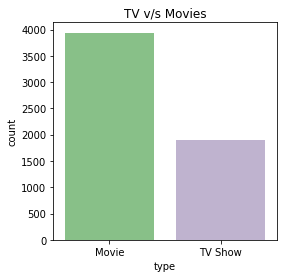

In [12]:
plt.figure(1, figsize=(4, 4))
plt.title("TV v/s Movies")
sns.countplot(x = "type", order=df['type'].value_counts().index[0:15] ,data=df,palette='Accent')

We can see that there are more movies than TV series.

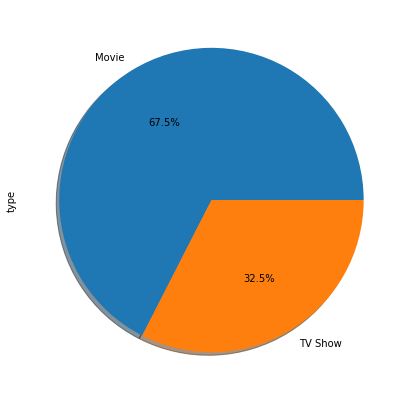

In [13]:
df['type'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(17,7))

Of all the content available on Netflix, there is nearly **67.5 percent** Movies and **32.5 percent** TV-Shows.

In [14]:
movie=df[df['type']=='Movie']
tv=df[df['type']=='TV Show']

# Movies

## Director with most movies

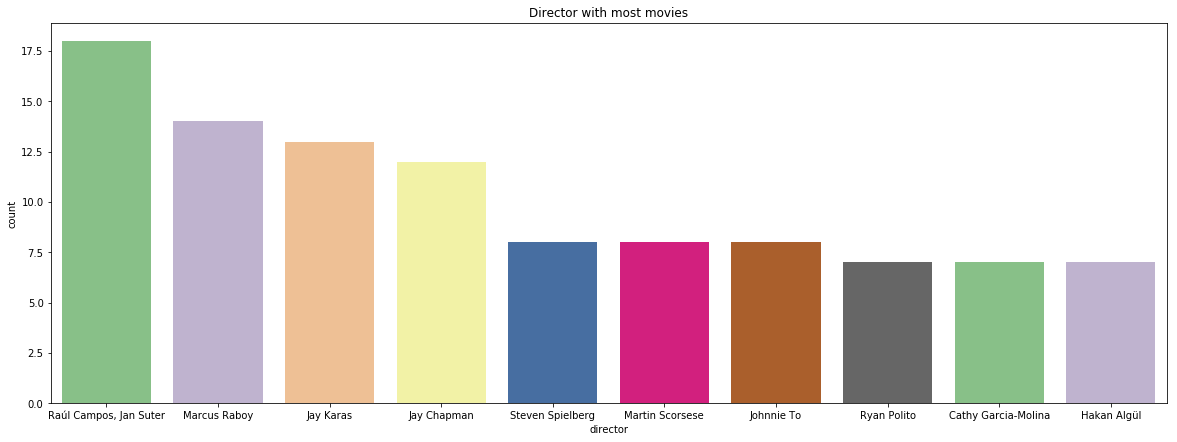

In [15]:
plt.figure(1, figsize=(20, 7))
plt.title("Director with most movies")
sns.countplot(x = "director", order=movie['director'].value_counts().index[0:10] ,data=movie,palette='Accent')

It can be clearly seen in the plot that ***Raul Campos*** has made most number of movies.

## Movies from Genres

In [16]:
from collections import Counter
col = "listed_in"
categories = ", ".join(movie['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="Movie")
data = [trace1]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

#### We can see that *Dramas* and *comedies* are genres on which most the content has been made.

## Comparing the length of Movies

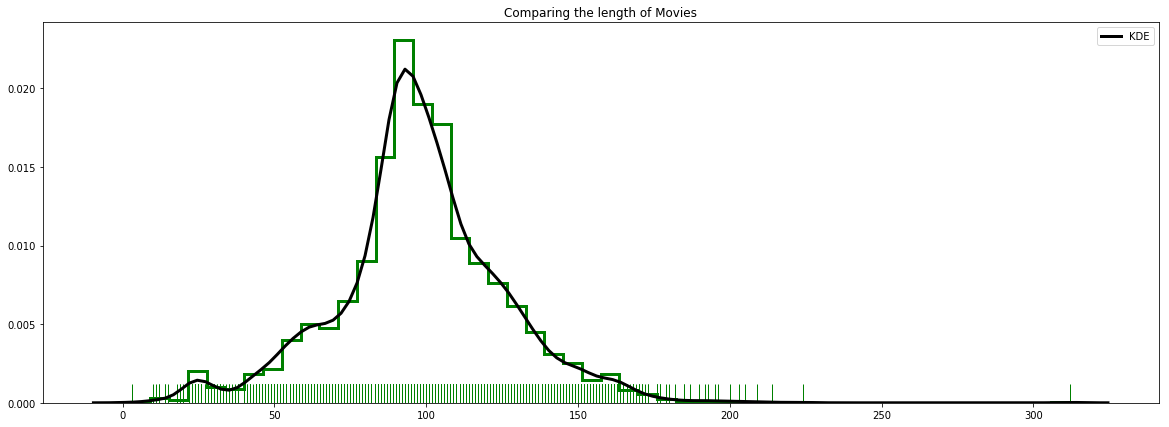

In [17]:
dur=[]
for i in movie['duration']:
    dur.append(int(i.strip('min')))
plt.figure(1, figsize=(20, 7))
plt.title("Comparing the length of Movies")
sns.distplot(dur,rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

Statistically we can see that length of movies follow a ***normal distribution***.

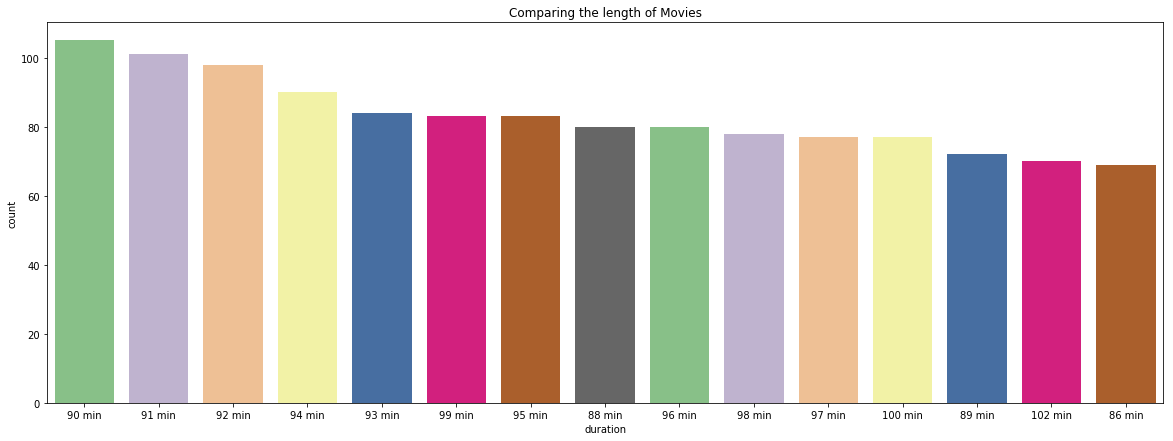

In [18]:
plt.figure(1, figsize=(20, 7))
plt.title("Comparing the length of Movies")
sns.countplot(x = "duration", order=movie['duration'].value_counts().index[0:15] ,data=df,palette='Accent')

It is observed that most of the movies are of length around **90 minutes**.

# TV Shows

## Director with most TV Shows

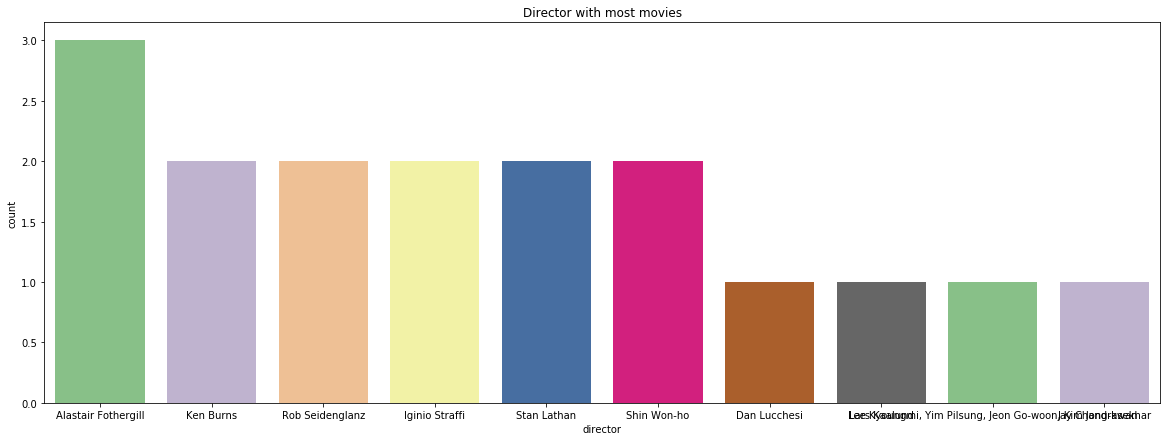

In [19]:
plt.figure(1, figsize=(20, 7))
plt.title("Director with most movies")
sns.countplot(x = "director", order=tv['director'].value_counts().index[0:10] ,data=tv,palette='Accent')

**Alastair Fothergill** has made the most (3) shows.

In [20]:
from collections import Counter
col = "listed_in"
categories = ", ".join(tv['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows")
data = [trace1]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

Most of the TV content has been made on **Dramas and Comedies**.

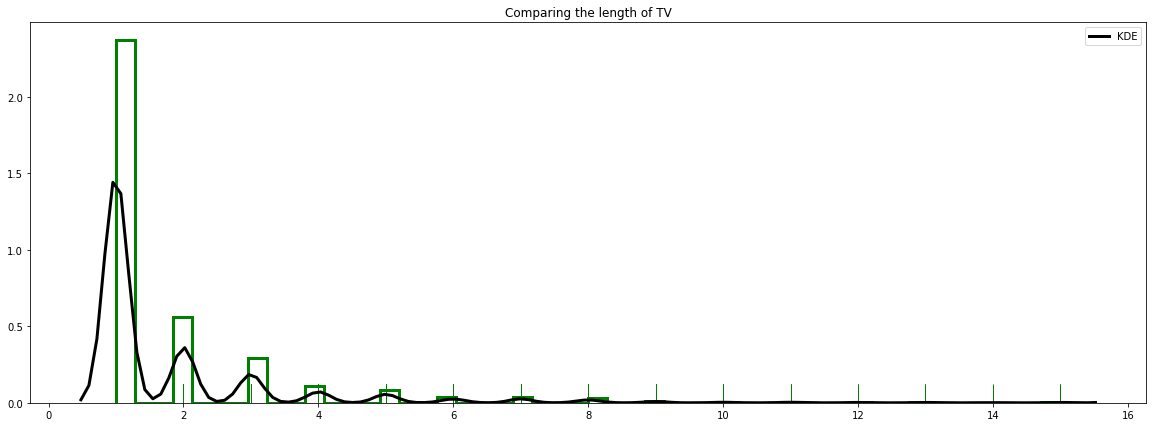

In [21]:
dur=[]
for i in tv['duration']:
    if 'Seasons' in i:
        dur.append(int(i.strip('Seasons')))
    else:
        dur.append(int(i.strip('Season')))
plt.figure(1, figsize=(20, 7))
plt.title("Comparing the length of TV")
sns.distplot(dur,rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

*Since the length of TV shows is expressed in terms of Number of Seasons and it Follows discrete distribution, therefore it is not much useful to define the above plot.*

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



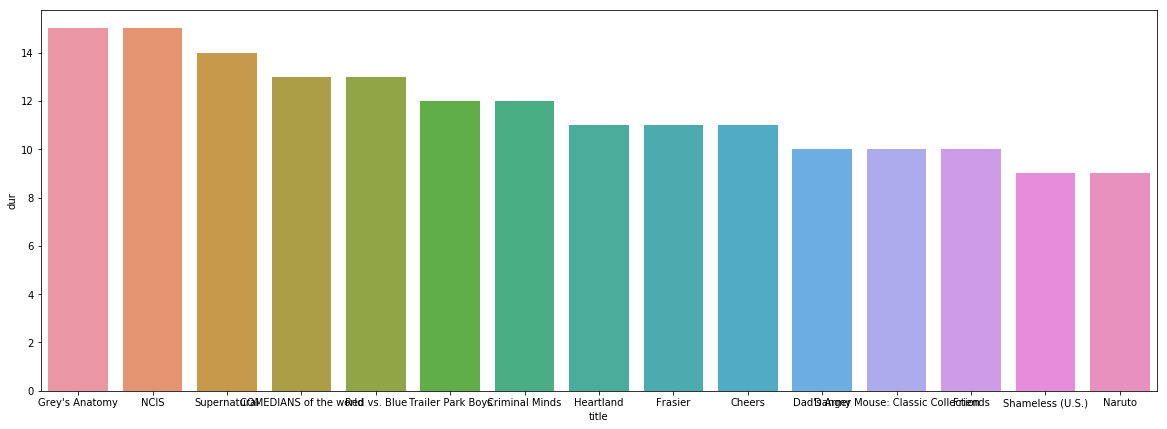

In [22]:
tv['dur']=dur
top=tv.nlargest(15,['dur'])
plt.figure(1, figsize=(20, 7))
sns.barplot(x="title", y="dur", data=top, ci="sd")

**Grey's Anatomy** has most number of Seasons.